# Run Baseline Models on 2018 Data with Deciles
#### 9/26/2020
---

## Load and Process Dataset
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
warnings.filterwarnings('ignore')

### Read in data

In [6]:
df = pd.read_csv('2018_mapped_processed_decile.csv').sample(frac=0.25)
df.head()

,Age,class-worker,education,marital-status,occupation,relationship,race,sex,extra-income,hours-per-week,place-of-birth,income
262768,40,Private-prof,associate,Never-married,TRN-Driver/Sales Workers And Truck Drivers,ref,black-aa-alone,male,0.0,40.0,Georgia/GA,5
187098,31,Private-prof,bachelor,Married,LGL-Paralegals And Legal Assistants,ref,american-indian-alone,female,0.0,40.0,California/CA,6
220547,33,Private-prof,grade11,Married,PRD-Machinists,ref,white-alone,male,0.0,45.0,Illinois/IL,7
415343,30,Local-gov,bachelor,Married,EDU-Elementary And Middle School Teachers,spouse,white-alone,female,0.0,40.0,Florida/FL,4
616162,21,Private-prof,HSgrad,Never-married,SAL-Cashiers,sibling,other-race-alone,male,0.0,27.0,California/CA,0


In [7]:
df.isnull().sum()

Age               0
class-worker      0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
extra-income      0
hours-per-week    0
place-of-birth    0
income            0
dtype: int64

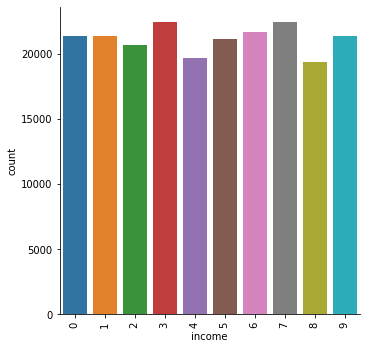

In [8]:
chart = sns.catplot(x="income", kind="count", data=df)
chart.set_xticklabels(rotation=90)



In [9]:
len(df)*.2

42357.600000000006

In [10]:
#subset the data into test and training data and labels
df_test_data = df.drop(columns=['income'])[:50000]
df_test_labels = df[['income']][:50000]
df_train_data = df.drop(columns=['income'])[50000:]
df_train_labels = df[['income']][50000:]

In [11]:
len(df_test_data)

50000

In [12]:
df_test_data.head()

,Age,class-worker,education,marital-status,occupation,relationship,race,sex,extra-income,hours-per-week,place-of-birth
262768,40,Private-prof,associate,Never-married,TRN-Driver/Sales Workers And Truck Drivers,ref,black-aa-alone,male,0.0,40.0,Georgia/GA
187098,31,Private-prof,bachelor,Married,LGL-Paralegals And Legal Assistants,ref,american-indian-alone,female,0.0,40.0,California/CA
220547,33,Private-prof,grade11,Married,PRD-Machinists,ref,white-alone,male,0.0,45.0,Illinois/IL
415343,30,Local-gov,bachelor,Married,EDU-Elementary And Middle School Teachers,spouse,white-alone,female,0.0,40.0,Florida/FL
616162,21,Private-prof,HSgrad,Never-married,SAL-Cashiers,sibling,other-race-alone,male,0.0,27.0,California/CA


### Pre-process categorical variables

In [13]:
cat_var = ['class-worker', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'place-of-birth']
for f in cat_var:
    enc = preprocessing.LabelEncoder()
    df_train_data[f] = enc.fit_transform(df_train_data[f])
    df_test_data[f] = enc.transform(df_test_data[f])

In [73]:
scaler = preprocessing.StandardScaler()
df_train_data = pd.DataFrame(scaler.fit_transform(df_train_data), columns = df_train_data.columns)
df_test_data = pd.DataFrame(scaler.transform(df_test_data), columns = df_train_data.columns)

## Train Models

### K-Nearest Neighbors

In [74]:
results = []
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(df_train_data, df_train_labels)
    acc = knn_model.score(df_test_data, df_test_labels)
    knn_predicted = knn_model.predict(df_test_data)
    df_predicted = pd.DataFrame(data = knn_predicted) 
    diff = []
    for i in range(len(df_predicted)):
        p = df_predicted[0].iloc[i]
        t = df_test_labels['income'].iloc[i]
        diff.append(abs(p-t))

    df_diff = pd.DataFrame(data = diff) 
    error = df_diff.mean()
    results.append([k, acc, error])

In [75]:
results

[[1,
  0.22218,
  0    1.96052
  dtype: float64],
 [2,
  0.21842,
  0    1.98028
  dtype: float64],
 [3,
  0.22184,
  0    2.068
  dtype: float64],
 [4,
  0.22664,
  0    2.04918
  dtype: float64],
 [5,
  0.23438,
  0    1.95798
  dtype: float64],
 [6,
  0.24002,
  0    1.88258
  dtype: float64],
 [7,
  0.24234,
  0    1.85278
  dtype: float64],
 [8,
  0.24372,
  0    1.83678
  dtype: float64],
 [9,
  0.24494,
  0    1.83364
  dtype: float64]]

### Bernoulli NB

In [76]:
results = []
for a in [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]:
    bnb_model = BernoulliNB(alpha=a)
    bnb_model.fit(df_train_data, df_train_labels)
    acc = bnb_model.score(df_test_data, df_test_labels)
    bnb_predicted = bnb_model.predict(df_test_data)
    df_predicted = pd.DataFrame(data = bnb_predicted) 
    diff = []
    for i in range(len(df_predicted)):
        p = df_predicted[0].iloc[i]
        t = df_test_labels['income'].iloc[i]
        diff.append(abs(p-t))

    df_diff = pd.DataFrame(data = diff) 
    error = df_diff.mean()
    results.append([a, acc, error])

In [77]:
results

[[0.0,
  0.21778,
  0    2.19182
  dtype: float64],
 [0.0001,
  0.21778,
  0    2.19182
  dtype: float64],
 [0.001,
  0.21778,
  0    2.19182
  dtype: float64],
 [0.01,
  0.21778,
  0    2.19182
  dtype: float64],
 [0.1,
  0.21778,
  0    2.19182
  dtype: float64],
 [0.5,
  0.21778,
  0    2.19182
  dtype: float64],
 [1.0,
  0.21776,
  0    2.19186
  dtype: float64],
 [2.0,
  0.21776,
  0    2.19186
  dtype: float64],
 [10.0,
  0.21778,
  0    2.19182
  dtype: float64],
 [100.0,
  0.21782,
  0    2.19014
  dtype: float64]]

### Linear Regression

In [78]:
df_train_label_dummy = pd.get_dummies(df_train_labels['income'], prefix='income')
df_test_label_dummy = pd.get_dummies(df_test_labels['income'], prefix='income')

In [67]:
linear_model = LinearRegression()
linear_model.fit(df_train_data, df_train_label_dummy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
lm_predicted = linear_model.predict(df_test_data)
r2 = linear_model.score(df_test_data, df_test_label_dummy)
r2

0.05411620102385897

In [69]:
def get_linear_model_accuracy(predicted, actual):
    df_predicted = pd.DataFrame(columns = actual.columns)
    results = []
    for i in range(len(predicted)):
        it = predicted[i]
        add = [0, 0]
        add[it.argmax()] = 1
        df_predicted.loc[i] = add
  
    for r in range(len(df_predicted)):
        results.append(np.array_equal(df_predicted.iloc[r].values, actual.iloc[r].values))
  
    return(results.count(True) / len(results))

In [70]:
get_linear_model_accuracy(lm_predicted, df_test_label_dummy)

IndexError: list assignment index out of range

### Logistic Regression

In [79]:
results = []
for c in [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]:
    log_model = LogisticRegression(C=c)
    log_model.fit(df_train_data, df_train_labels)
    acc = log_model.score(df_test_data, df_test_labels)
    log_predicted = log_model.predict(df_test_data)
    df_predicted = pd.DataFrame(data = log_predicted) 
    diff = []
    for i in range(len(df_predicted)):
        p = df_predicted[0].iloc[i]
        t = df_test_labels['income'].iloc[i]
        diff.append(abs(p-t))

    df_diff = pd.DataFrame(data = diff) 
    error = df_diff.mean()
    results.append([a, acc, error])

In [80]:
results

[[100.0,
  0.22592,
  0    2.20732
  dtype: float64],
 [100.0,
  0.234,
  0    2.04218
  dtype: float64],
 [100.0,
  0.23536,
  0    1.99644
  dtype: float64],
 [100.0,
  0.23612,
  0    1.9882
  dtype: float64],
 [100.0,
  0.23608,
  0    1.98718
  dtype: float64],
 [100.0,
  0.23618,
  0    1.98774
  dtype: float64],
 [100.0,
  0.2363,
  0    1.98682
  dtype: float64],
 [100.0,
  0.23642,
  0    1.987
  dtype: float64],
 [100.0,
  0.23632,
  0    1.98678
  dtype: float64]]